<a href="https://colab.research.google.com/github/Darshan0805/Advanced-Machine-Learning/blob/main/2348548_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
diabetes=pd.read_csv('/content/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


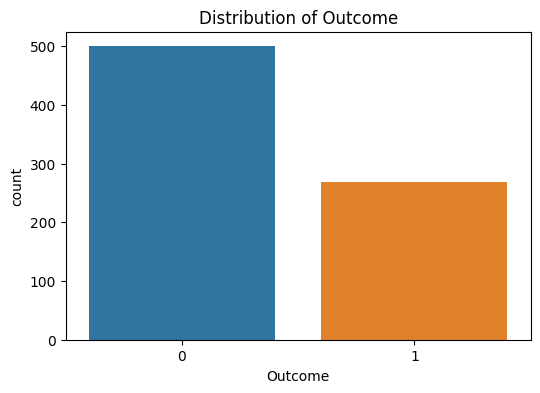

In [15]:
# Distribution of the target variable 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes)
plt.title('Distribution of Outcome')
plt.show()

In [17]:
# Split the data into features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardizing the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [21]:
# Apply PCA and print the variance of the coefficients
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print("Variance of the coefficients after PCA:")
print(pca.explained_variance_ratio_)

Variance of the coefficients after PCA:
[0.25533281 0.22070281 0.12800509 0.11125003 0.09715756 0.08800606
 0.05126467 0.04828097]


In [22]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [23]:
# KNN before dimensionality reduction
knn_before = KNeighborsClassifier()
knn_before.fit(X_train_std, y_train)
y_pred_knn_before = knn_before.predict(X_test_std)

In [24]:
# Decision Tree before dimensionality reduction
dt_before = DecisionTreeClassifier()
dt_before.fit(X_train_std, y_train)
y_pred_dt_before = dt_before.predict(X_test_std)

In [25]:
# Random Forest before dimensionality reduction
rf_before = RandomForestClassifier()
rf_before.fit(X_train_std, y_train)
y_pred_rf_before = rf_before.predict(X_test_std)

In [26]:
# KNN classifier after PCA
knn_after_pca = KNeighborsClassifier()
knn_after_pca.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test_std)
y_pred_knn_after_pca = knn_after_pca.predict(X_test_pca)

In [27]:
# Decision Tree classifier after PCA
dt_after_pca = DecisionTreeClassifier()
dt_after_pca.fit(X_train_pca, y_train)
y_pred_dt_after_pca = dt_after_pca.predict(X_test_pca)

In [28]:
# Random Forest classifier after PCA
rf_after_pca = RandomForestClassifier()
rf_after_pca.fit(X_train_pca, y_train)
y_pred_rf_after_pca = rf_after_pca.predict(X_test_pca)

In [29]:
# KNN classifier after LDA
knn_after_lda = KNeighborsClassifier()
knn_after_lda.fit(X_train_lda, y_train)
X_test_lda = lda.transform(X_test_std)
y_pred_knn_after_lda = knn_after_lda.predict(X_test_lda)

In [30]:
# Decision Tree classifier after LDA
dt_after_lda = DecisionTreeClassifier()
dt_after_lda.fit(X_train_lda, y_train)
y_pred_dt_after_lda = dt_after_lda.predict(X_test_lda)

In [31]:
# Random Forest classifier after LDA
rf_after_lda = RandomForestClassifier()
rf_after_lda.fit(X_train_lda, y_train)
y_pred_rf_after_lda = rf_after_lda.predict(X_test_lda)

In [32]:
# Evaluate the metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [33]:
# Metrics before dimensionality reduction
print("\nMetrics Before Dimensionality Reduction:")
print("KNN:")
print(evaluate(y_test, y_pred_knn_before))
print("Decision Tree:")
print(evaluate(y_test, y_pred_dt_before))
print("Random Forest:")
print(evaluate(y_test, y_pred_rf_before))


Metrics Before Dimensionality Reduction:
KNN:
(0.6948051948051948, 0.5833333333333334, 0.509090909090909, 0.5436893203883495)
Decision Tree:
(0.7467532467532467, 0.6333333333333333, 0.6909090909090909, 0.6608695652173913)
Random Forest:
(0.7272727272727273, 0.6101694915254238, 0.6545454545454545, 0.6315789473684211)


In [34]:
# Metrics after PCA
print("\nMetrics After PCA:")
print("KNN:")
print(evaluate(y_test, y_pred_knn_after_pca))
print("Decision Tree:")
print(evaluate(y_test, y_pred_dt_after_pca))
print("Random Forest:")
print(evaluate(y_test, y_pred_rf_after_pca))


Metrics After PCA:
KNN:
(0.6948051948051948, 0.5833333333333334, 0.509090909090909, 0.5436893203883495)
Decision Tree:
(0.6883116883116883, 0.5555555555555556, 0.6363636363636364, 0.5932203389830508)
Random Forest:
(0.7207792207792207, 0.6153846153846154, 0.5818181818181818, 0.5981308411214953)


In [35]:
# Metrics after LDA
print("\nMetrics After LDA:")
print("KNN:")
print(evaluate(y_test, y_pred_knn_after_lda))
print("Decision Tree:")
print(evaluate(y_test, y_pred_dt_after_lda))
print("Random Forest:")
print(evaluate(y_test, y_pred_rf_after_lda))


Metrics After LDA:
KNN:
(0.7272727272727273, 0.6101694915254238, 0.6545454545454545, 0.6315789473684211)
Decision Tree:
(0.7597402597402597, 0.6607142857142857, 0.6727272727272727, 0.6666666666666666)
Random Forest:
(0.7597402597402597, 0.6607142857142857, 0.6727272727272727, 0.6666666666666666)


Analyzing the diabetes dataset, the model found that using Linear Discriminant Analysis (LDA) as a technique to simplify the data helped Decision Tree and Random Forest classifiers perform better. LDA considers the different diabetes outcomes and seems more helpful than another technique called Principal Component Analysis (PCA) in making the classes more distinct.